In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./pokemon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [4]:
#计算出每个特征有多少个百分比是缺失的
percent_missing = df.isnull().sum() *100 / len(df)
missing_value_df = pd.DataFrame({
                                'column_name':df.columns,
                                'percent_missing':percent_missing
                                })

In [5]:
missing_value_df

,column_name,percent_missing
abilities,abilities,0.000000
against_bug,against_bug,0.000000
against_dark,against_dark,0.000000
against_dragon,against_dragon,0.000000
against_electric,against_electric,0.000000
against_fairy,against_fairy,0.000000
against_fight,against_fight,0.000000
against_fire,against_fire,0.000000
against_flying,against_flying,0.000000
against_ghost,against_ghost,0.000000


In [6]:
missing_value_df.sort_values('percent_missing',ascending=False).head(10)

,column_name,percent_missing
type2,type2,47.940075
percentage_male,percentage_male,12.234707
weight_kg,weight_kg,2.496879
height_m,height_m,2.496879
name,name,0.000000
capture_rate,capture_rate,0.000000
classfication,classfication,0.000000
defense,defense,0.000000
experience_growth,experience_growth,0.000000
hp,hp,0.000000


<AxesSubplot:>

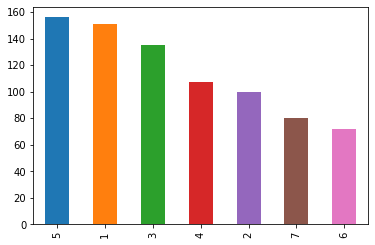

In [7]:
#查看各代口袋妖怪的数量
df['generation'].value_counts().sort_values(ascending=False).plot.bar(color=['C0','C1','C2','C3','C4','C5','C6','C7'])
#加入颜色列表可以将不同类别的数据用不同的颜色呈现，如果不加则所有数据全部默认蓝色呈现

<AxesSubplot:>

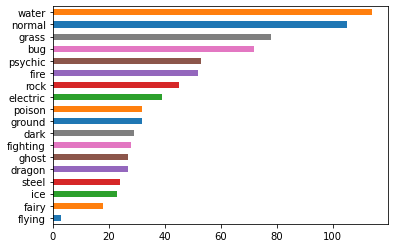

In [8]:
#查看每个系口袋妖怪的数量
df['type1'].value_counts().sort_values(ascending=True).plot.barh(color=['C0','C1','C2','C3','C4','C5','C6','C7'])

In [9]:
types = df['type1'].unique()
all_types=[]
for pokemon in types:
    all_types.append(pokemon)
all_types

['grass',
 'fire',
 'water',
 'bug',
 'normal',
 'poison',
 'electric',
 'ground',
 'fairy',
 'fighting',
 'psychic',
 'rock',
 'ghost',
 'ice',
 'dragon',
 'dark',
 'steel',
 'flying']

In [10]:
allTypes =[x for x in df['type1'].unique()]
allTypes

['grass',
 'fire',
 'water',
 'bug',
 'normal',
 'poison',
 'electric',
 'ground',
 'fairy',
 'fighting',
 'psychic',
 'rock',
 'ghost',
 'ice',
 'dragon',
 'dark',
 'steel',
 'flying']

In [11]:
df_count = df['type1'].value_counts().reset_index()
df_count.columns=['pokemon_type', 'count']
df_count

,pokemon_type,count
0,water,114
1,normal,105
2,grass,78
3,bug,72
4,psychic,53
5,fire,52
6,rock,45
7,electric,39
8,poison,32
9,ground,32


<AxesSubplot:title={'center':'Correlation Heatmap'}>

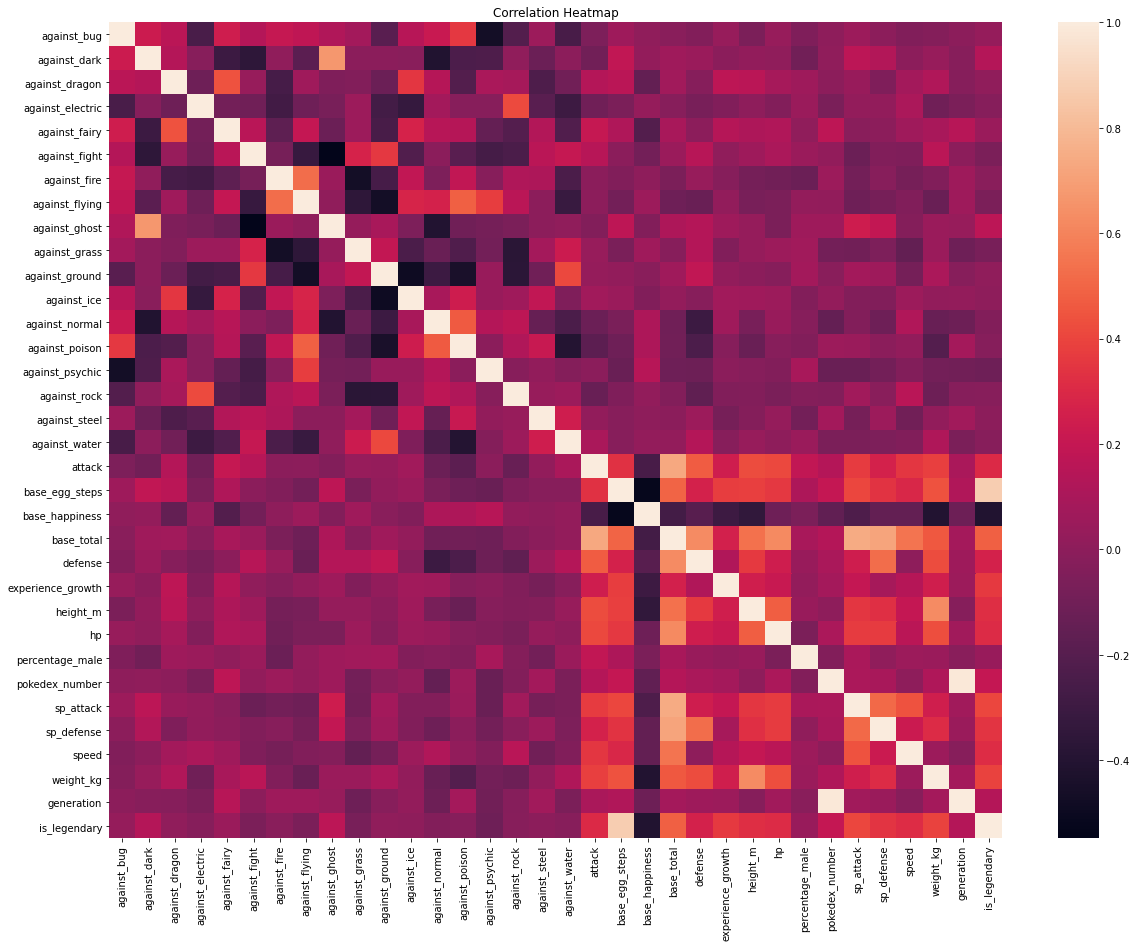

In [14]:
#相关热力图分析
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title('Correlation Heatmap')
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

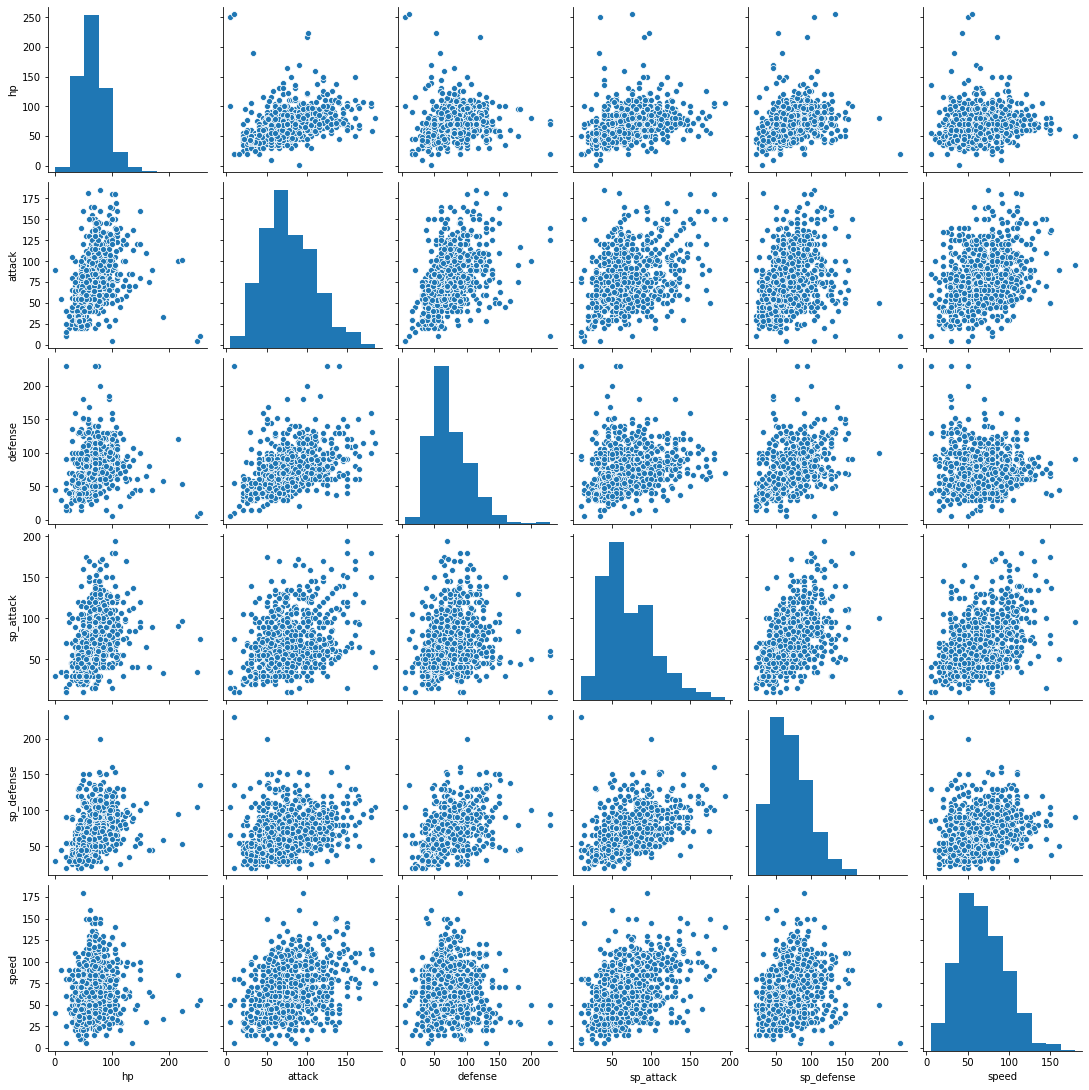

In [15]:
interested =['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
sns.pairplot(df[interested])

<AxesSubplot:title={'center':'Correlation Heatmap'}>

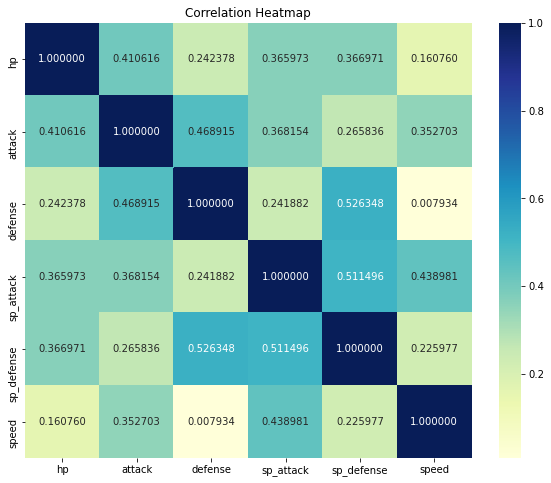

In [16]:
# 通过相关性分析heatmap分析5个基础属性
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title('Correlation Heatmap')
corr = df[interested].corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           annot=True, fmt='f', cmap="YlGnBu")

In [17]:
for c in interested:
    df[c] = df[c].astype(float)

In [18]:
df = df.assign(total_stats = df[interested].sum(axis=1))

In [22]:
df[df.total_stats >= 525].shape

(167, 42)

Text(0, 0.5, 'Frequency')

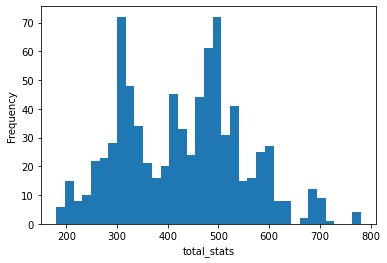

In [23]:
#种族值分布
total_stats = df.total_stats
plt.hist(total_stats, bins=35)
plt.xlabel('total_stats')
plt.ylabel('Frequency')

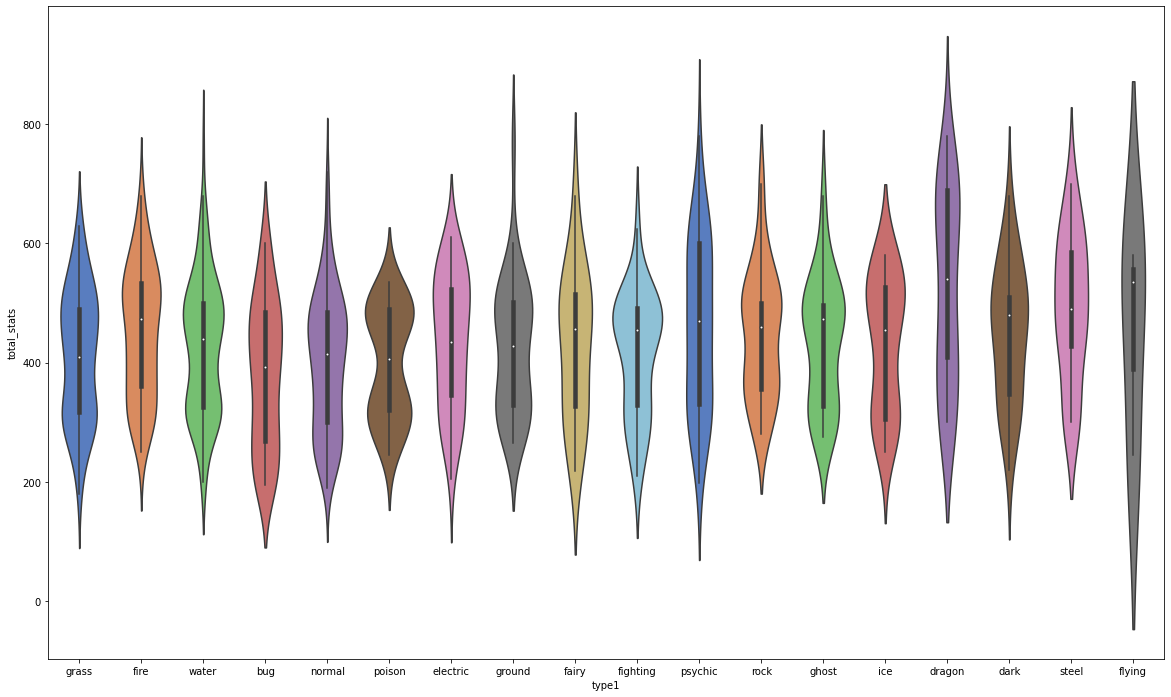

In [24]:
plt.subplots(figsize=(20,12))
ax = sns.violinplot(x='type1', y='total_stats', data=df, palette='muted')

In [26]:
#种族值大于570的，但不是神兽的
df[(df.total_stats >= 570) & (df.is_legendary == 0)]['name'].head(10)

2        Venusaur
5       Charizard
8       Blastoise
17        Pidgeot
64       Alakazam
79        Slowbro
93         Gengar
114    Kangaskhan
126        Pinsir
129      Gyarados
Name: name, dtype: object

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


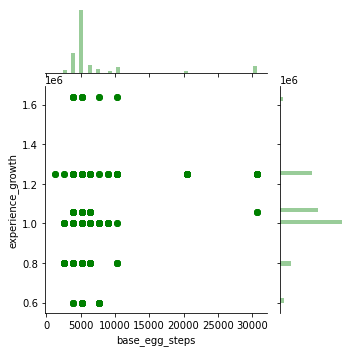

In [27]:
sns.jointplot('base_egg_steps', 'experience_growth', data=df, size=5, ratio=3,color='g')

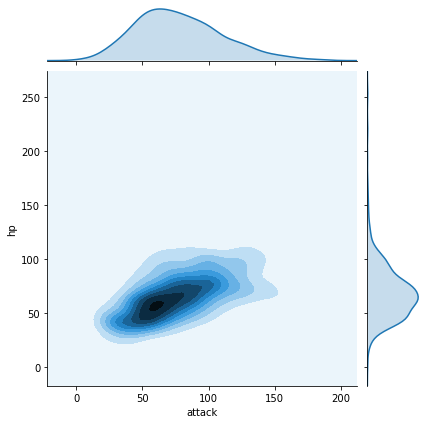

In [28]:
sns.jointplot('attack', 'hp', data=df, kind='kde')

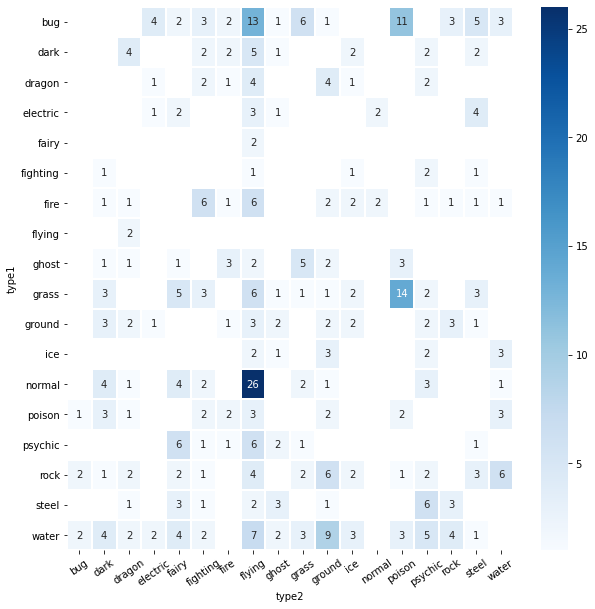

In [29]:
#双系宝可梦数量统计
plt.subplots(figsize=(10,10))

sns.heatmap(
    df[df['type2']!='None'].groupby(['type1','type2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap='Blues')

plt.xticks(rotation=35)
plt.show()